Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). On JupyterLab, you may want to hit the "Validate" button as well.

Caution: do not mess with the notebook's metadata; do not change a pre-existing cell's type; do not copy pre-existing cells (add new ones with the + button instead). This will break autograding; you will get a 0; you are warned.

<table style="width: 100%; border: none;" cellspacing="0" cellpadding="0" border="0">
  <tr>
    <td><img src="https://www.planetegrandesecoles.com/wp-content/uploads/2021/07/Identite%CC%81-visuelle-Plane%CC%80te-BAC-8-600x398.png" style="float: left; width: 100%" />
</td>
    <td><a style="font-size: 3em; text-align: center; vertical-align: middle;" href="https://moodle.polytechnique.fr/course/view.php?id=19260">[CSC2S004EP - 2024] - Introduction to Machine Learning</a>
</td>
  </tr>
</table>

<a style="font-size: 3em;">Lab Session 6: Building a Neural Network From Scratch</a>

J.B. Scoggins - Adrien Ehrhardt - Jesse Read

# Introduction

In this lab you will learn to create a simple multilayer perceptron (MLP) neural network from scratch using only the Numpy package for matrix-vector operations. In order to train the network on several datasets, you will need to implement the back-propagation algorithm with gradient descent. Before getting started, let's review the notations we will use in this lab and recall the stochastic gradient descent algorithm.

## Notation

We will consider simple feed-forward networks that can be described by the following recursive relationship,

$$
\begin{align}
&z^l = a^{l-1} W^l + b^l,\\
&a^l = \sigma^l(z^l),
\end{align}
$$

where $a^l$ is the output (activation) of layer $l$ which is a nonlinear function $\sigma^l$ of a linear transformation of the previous layer's output.  The linear transformation is performed using the weight matrix $W^l$ and bias vector $b^l$ associated with the layer $l$.  We will denote the last layer in the network with a capital $L$ superscript.  The recursion is stopped by setting $a^0 = x$, where $x$ is the input vector to our network.  Note that in the recursive expressions above, we implicitly assume that our input/output vectors are row vectors.  The reason for this will be apparent later.

Taking this notation into account, we see that a network with $L-1$ hidden layers is fully expressed by its $L$ weight matrices, bias vectors, and activation functions.  We can denote the set of trainable parameters in our network by $\theta = \{ W^1, \dots, W^L, b^1, \dots, b^L \}$.

**Beware that in Python, weights', biases' and activations' indices will start at 0**.

In this lab, we are only concerned with supervised learning tasks.  Recall that in supervised learning, we have a dataset represented by a list of $(x, y)$ pairs where $x$ is the input to our model and $y$ is the desired output.

- For regression problems where we want to fit a function $y = f(x)$, $x$ is the independent variable vector, and $y$ is the function value.
- In classification problems, $x$ will correspond to a set of attributes and $y$ the corresponding label.

The goal of supervised learning is to "train" our network by adjusting its parameters in order to minimize a cost function over the entire training set,

$$
\min_\theta \mathcal{L} = \min_\theta \sum_{i=1}^N \ell^{(i)}
$$

where $\ell^{(i)} = \ell(\sigma^L(\sigma^{L-1}(\dots(x^{(i)}W^1 + b^1)\dots)W^L + b^L), y^{(i)})$ and $\ell(\hat{y}, y)$ denotes the particular form of the loss function being considered.  In this lab, we will use 2 different loss functions:

1. Quadratic Loss: $\ell(\hat{y}, y) = \|\hat{y} - y\|^2$
2. Cross-entropy Loss: $\ell(\hat{y}, y) = -[ y \ln\hat{y} + (1-y)\ln(1-\hat{y})]$

# Step 1: Build an untrainable network

Understanding (and implementing) the back-propagation algorithm can seem a little daunting at first. Therefore, let's start by building out the functions we need just to create a network that cannot be trained, but can predict (feedforward pass). First load the libraries.

In [1]:
from typing import List, Type
import warnings
warnings.filterwarnings(action='ignore', category=RuntimeWarning)  # s.t. you don't freak out when it's just a harmless warning
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

We wish to implement activation functions ($\sigma^\ell$ in the notations above) as classes, to be able to also incorporate their derivatives (we will need them for back-propagation).

However, we don't want multiple *instances* of activation function *objects* (the activation is always the same), hence we rely on *static* methods (these are "Class-wide methods" and do NOT depend on a particular object's values).

Finally, we want to be able to call the activation function directly by its class' name, like a function.

Due to all these reasons, we rely on the base class Activation below. In the next cell, we explain why it **appears** complicated (it's not).

*Python tricks:* 
- Static methods are callable with uninstanciated class objects.
- `__call__` methods are retrieved when using parentheses with an instanciated class object.
- However, instanciation has precedence over `__call__`, so calling a Class like another static method of that class or a function will not work (see [here](https://stackoverflow.com/questions/26793600/decorate-call-with-staticmethod)).
- `__init__` (typically used to customize the instanciated objects of a class) cannot return anything.
- The trick is thus to use it in conjunction with `__new__` (which creates the object and passes it to `__init__`).

In [2]:
class Activation:
    """
    Base activation node class
    """

    def __new__(self, x: float) -> float:
        """
        What to do when instantiating an object: this basically says Activation(x)
        will be equivalent to Activation()(x).

        :param float or np.array x: input of the activation
        :return: call the activation function
        :rtype: float or np.array
        """
        return self.__call__(x)

## Exercise 1: Implement the activation functions

1. The easiest activation we can implement is the identity function which simply returns the input as itself.  Implement this below in the class template `Identity`. The `prime` function should implement the derivative of the activation.

*Python tricks*: `Identity` inherits from `Activation`; thus, calling `Identity(some_array)` will call `Identity.__new__(self, some_array)` which in turn will call the static method `Identity.__call__(some_array)`.

*Python hint:* see [`np.ones_like`](https://numpy.org/doc/stable/reference/generated/numpy.ones_like.html).

In [3]:
class Identity(Activation):
    """
    Identity activation node
    """
    @staticmethod
    def __call__(x: np.ndarray) -> np.ndarray:
        """
        Implements the identity activation function

        :param np.array x: input of the activation
        :return: identity of input
        :rtype: np.ndarray
        """
        # YOUR CODE HERE
        return x
        
    @staticmethod
    def prime(x: np.ndarray) -> np.ndarray:
        """
        Implements the derivative of the identity activation function

        :param np.array x: input of the activation
        :return: derivative of input
        :rtype: np.ndarray
        """
        # YOUR CODE HERE
        return np.ones_like(x)

In [4]:
assert Identity(np.array([1])) == np.array([1])
print(Identity(np.array([1, 1])))

[1 1]


2. The threshold activation function takes an input and returns 1 if the input is positive, otherwise 0. Implement the `Threshold` class below.

*Python hint:* see [`np.where`](https://numpy.org/doc/stable/reference/generated/numpy.where.html), and [`np.zeros_like`](https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html).

In [5]:
class Threshold(Activation):
    """
    Threshold activation node
    """
    @staticmethod
    def __call__(x: np.ndarray) -> np.ndarray:
        """
        Implements the threshold activation function

        :param np.ndarray x: input of the activation
        :return: if x > 0, 1, else 0
        :rtype: np.ndarray
        """
        # YOUR CODE HERE
        return np.where(x > 0, 1, 0)
    
    @staticmethod
    def prime(x: np.ndarray) -> np.ndarray:
        """
        Implements the derivative of the threshold activation function

        :param np.ndarray x: input of the activation
        :return: derivative of input
        :rtype: np.ndarray
        """
        # YOUR CODE HERE
        return np.zeros_like(x)

In [6]:
assert Threshold(np.array([0.5])) == np.array([1])
print(Threshold(np.array([-0.1, 0.1])))

[0 1]


3. Recall that the sigmoid function is given by $\sigma(x) = \dfrac{1}{1 + \exp(-x)}$. Calculate its derivative.

*Recall* that the derivative of $\dfrac{1}{f(x)}$ is $-\dfrac{f'(x)}{f(x)^2}$. Rearrange the resulting expression so that only $\sigma$ appears.

**Expected qualitative answer in the cell below marked "YOUR ANSWER HERE"**

YOUR ANSWER HERE


We rewrite the sigma function as : $ \sigma(x) = \frac{1}{1+e^{-x}} = (1 + e^{-x})^{-1} $ 



Using chain rule : $ f(x) = 1 + e^{-x} $, so $ \sigma(x) = f(x)^{-1} $

The derivative is:
$\sigma'(x) = -f'(x) f(x)^{-2}$

We have $ f'(x) = -e^{-x} $ 

By sustitution : $ \sigma'(x) = -\frac{f'(x)}{f(x)^2} = \frac{e^{-x}}{(1 + e^{-x})^2} $

We rewrite in terms of sigma : 
$ \sigma'(x) = \frac{1 - \sigma(x)}{\sigma(x)} \cdot \frac{1}{(1 + e^{-x})^2} $

Since $ 1 + e^{-x} = \frac{1}{\sigma(x)} $, we have:
$\sigma'(x) = \frac{1 - \sigma(x)}{\sigma(x)} \cdot \left(\frac{1}{\sigma(x)}\right)^2 = \sigma(x)(1 - \sigma(x))$

Hence $ \sigma'(x) = \sigma(x)(1 - \sigma(x)) $


4. Implement the `Sigmoid` class below.

In [7]:
class Sigmoid(Activation):    
    """
    Threshold activation node
    """
    @staticmethod
    def __call__(x: np.ndarray) -> np.ndarray:
        """
        Implements the sigmoid activation function

        :param np.ndarray x: input of the activation
        :return: sigmoid transform of input
        :rtype: np.ndarray
        """
        # YOUR CODE HERE
        return 1 / (1 + np.exp(-x))
        
    @staticmethod
    def prime(x: np.ndarray) -> np.ndarray:
        """
        Implements the derivative of the sigmoid activation function
        (you can make good use of Sigmoid(...)!)

        :param np.ndarray x: input of the activation
        :return: derivative of input
        :rtype: np.ndarray
        """
        # YOUR CODE HERE
        s = Sigmoid.__call__(x)
        return s * (1 - s)

In [8]:
assert Sigmoid(np.array([0])) == np.array([0.5])
print(Sigmoid(np.array([-1, 0, 1])))

[0.26894142 0.5        0.73105858]


4. Plot the activation functions and their derivative on the domain [-5, 5] with the function below. Are the graphical results satisfactory? **(no answer expected)**.

In [9]:
def plot_activation(activation: Type[Activation]):
    x = np.arange(-5, 5, 0.01)
    plt.plot(x, activation(x))
    plt.plot(x, activation.prime(x))
    plt.legend((activation.__name__, activation.__name__ + " prime"))
    plt.show()

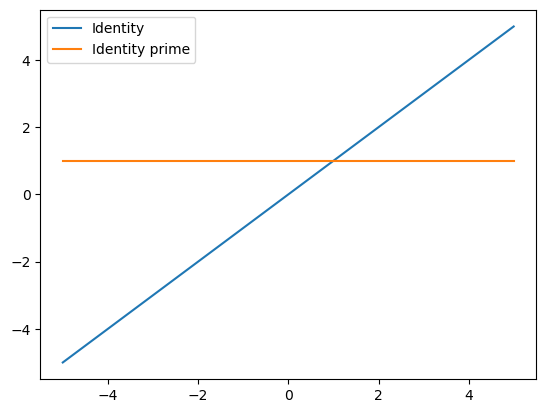

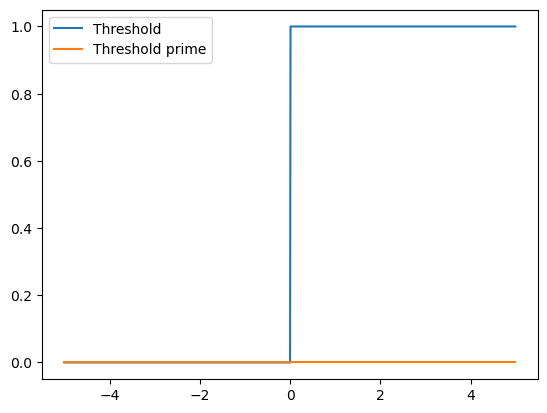

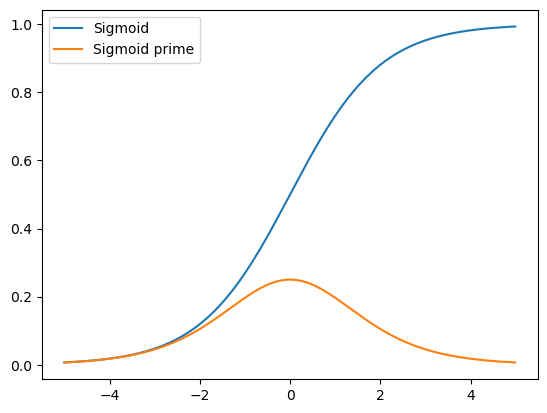

In [10]:
plot_activation(Identity)
plot_activation(Threshold)
plot_activation(Sigmoid)

## Exercise 2: the Network class

During this lab, we will build on the following python class called `Network` which will represent our neural net.  The `Network` class will keep track of the weights, biases, and activations needed to evaluate and train our model.  The following exercises will guide you through building up the class from the skeleton below.

In [11]:
class Network:
    """
    A simple implementation of a feed-forward artificial neural network.
    Work on this class throughout the entire exercise, rerunning this cell after each update.
    """

    def __init__(self, sizes: list, activations: list):
        """
        Construct a network given a list of the number of neurons in each layer and
        a list of activations which will be applied to each layer.

        :param list sizes: A list of integers representing the number of nodes in each layer,
        including the input and output layers.
        :param list activations: A list of callable objects representing the activation functions.
        Its size should be one less than sizes.
        """
        self.sizes = sizes
        self.sigmas = activations
        self.loss = []

        self.biases = [np.random.randn(1, n) for n in sizes[1:]]
        self.weights = [
            np.random.randn(m, n) for m, n in zip(sizes[:-1], sizes[1:])
        ]
        # Optional: better initialization
        # self.weights = [
        #     np.random.randn(m, n) / np.sqrt(m) for m, n in zip(sizes[:-1], sizes[1:])
        # ]

    def num_params(self) -> int:
        """Returns the total number of trainable parameters in this network."""
        return sum([m * n + n for m, n in zip(self.sizes[:-1], self.sizes[1:])])

    def feed_forward(self, x: np.array):
        """
        Evaluates the network for the given input and returns the intermediary results.

        :param numpy.array x: A numpy 2D-array where the columns represent input variables
        and rows represent independent samples.
        :return: output of the network
        :rtype: np.array, list, list
        """
        activations = [x]
        zs = []

        # Forward pass, storing z and a as we go
        for W, b, sigma in zip(self.weights, self.biases, self.sigmas):
            zs.append(np.matmul(activations[-1], W) + b)
            activations.append(sigma(zs[-1]))
        return activations[-1], activations, zs

    def back_propagation(self, x: np.array, y: np.array, cost, verbose: bool = False):
        """
        Compute gradients of cost function w.r.t network parameters for a single training point.

        :param numpy.array x: a single input in a 2D array (1, #features), or possibly
            several inputs in a 2D array (#samples, #features)
        :param numpy.array y: a single output
        :param Cost cost: a cost class
        :param bool verbose: whether to print debugging information (you don't have to implement this feature)
        :return: list of gradients of weights, list of gradients of biases
        :rtype: list, list
        """
        # Exercise 1.2
        L = len(self.sizes) 
        _, list_a, list_z = self.feed_forward(x)
        # YOUR CODE HERE
        L = len(self.sizes) - 1 
        act, a, z = self.feed_forward(x)

        b_grad = [0]*L
        b_grad[-1] = (cost.prime(act, y) * self.sigmas[-1].prime(z[-1]))
        
        for i in range(L-2, -1, -1):
            b_grad[i] = (b_grad[i+1] @ (self.weights[i+1]).T) * self.sigmas[i].prime(z[i])

        w_grad = [a[0].T @ b_grad[0]]
        for i in range(1, L):
            w_grad.append((a[i]).T @ b_grad[i])
            
        for i in range(L):
            b_grad[i] = b_grad[i].sum(axis=0, keepdims=True)
        
        return w_grad, b_grad

    def update_step(self, x_train: np.array, y_train: np.array, cost, learning_rate: float,
                    verbose: bool = False):
        """
        Compute the average parameter gradients over the whole training set and do a GD step.
        N.B.: this does not return anything!

        :param numpy.array x_train: A design matrix (2D array (#samples, #features))
        :param numpy.array y_train: A vector / array of responses
        :param Cost cost: A callable object with signature cost(y_pred, y) for computing the cost of a single
        training example.
        :param float learning_rate: The learning rate to use in the GD step.
        :param bool update_step: Perform an update step: average all the gradients and update the parameters.
        """
        # Exercise 1.3
        ## Suggestions
        # Compute gradients of weights and biases for all layers and samples
        # Update the weights and biases
        # YOUR CODE HERE
        n = x_train.shape[0]
        w_grad_sum = [np.zeros_like(w) for w in self.weights]
        b_grad_sum = [np.zeros_like(b) for b in self.biases]

        # Accumulate gradients over the entire training set
        for x, y in zip(x_train, y_train):
            w_grad, b_grad = self.back_propagation(x.reshape(1, -1), y.reshape(1, -1), cost)
            w_grad_sum = [wsum + g for wsum, g in zip(w_grad_sum, w_grad)]
            b_grad_sum = [bsum + g for bsum, g in zip(b_grad_sum, b_grad)]

        # Update weights and biases
        self.weights = [w - learning_rate * wsum / n for w, wsum in zip(self.weights, w_grad_sum)]
        self.biases = [b - learning_rate * bsum / n for b, bsum in zip(self.biases, b_grad_sum)]

    def train(self, x_train, y_train, cost, learning_rate: float, epochs: int = 100, verbose: bool = True):
        """
        Trains this network on the training data, i.e. iterate the update step.
        N.B.: this does not return anything!

        :param np.array x_train: A design matrix
        :param np.array y_train: A vector of responses
        :param Cost cost: A callable object with signature cost(y_pred, y) for computing the cost of a single
        training example.
        :param float learning_rate: The learning rate to use in the GD step.
        :param int epochs: The number of epochs to train with.
        :param bool verbose: Whether to print the loss at each epoch.
        """
        for i in range(epochs):
            self.update_step(x_train, y_train, cost, learning_rate)

            # Compute the loss
            y_pred, _, _ = self.feed_forward(x_train)
            loss = cost(y_pred, y_train)
            self.loss.append(loss)
            if verbose:
                print('epoch:', i, '\n\tloss: ', loss)

1. From the recursion formulas above, write down the shapes of the weight matrices and bias vectors, given the number of neurons $d^l$ in layer $l$. **Expected concise qualitative answer in the cell below marked "YOUR ANSWER HERE"**.

YOUR ANSWER HERE

For a network with layer sizes [n0, n1, n2, ..., nL]:
 The weight matrix between layer l-1 and l is of shape (n_{l-1}, n_l) and the bias vector for layer l is of shape (1, n_l)

2. Implement the init `__init__` function in `Network` **above**, which is tested **below**.

* Store the provided `sizes` (a list of size $L + 1$ representing the respective size $d^l$ of each layer including the input which will be given as a parameter) and `sigmas` (a list of size $L$ of callable functions representing the activation function in each layer which will be given as a parameter) in attributes `sizes` and `sigmas`;

* Construct a list of weight matrices (in a `weights` attribute), a list of bias vectors (in a `biases` attribute) which are randomly initialized from the standard normal distribution (see `np.random.randn`); pay attention to the size of each list and the shape of each element which must be consistent with `sizes`.

*Python hints*: `array[1:]` gives you all the array except the first entry; `array[:-1]` gives you all the array except the last entry; `for x, y in zip(a, b)` lets you iterate "simultaneously" through a pair of objects of same length.

In [12]:
# Test the network's initialization
assert Network([1], Sigmoid).sizes == [1]

3. Implement the `num_params` function in `Network` **above** which is tested **below**. You may use your knowledge of the shapes of the weights and biases given the `sizes` argument.

In [13]:
# Test the network's number of parameters
assert Network([1, 2, 2, 1], [Sigmoid, Sigmoid, Sigmoid]).num_params() == 13

4. Implement the `feed_forward` function in `Network` **above** which is tested **below**. Use the recurrence relations discussed in the Notation section, in particular:

$$z^l = a^{l-1} W^l + b^l,\\
a^l = \sigma^l(z^l).$$

Return:
* the output of the network, *i.e.* $a^L$.
* the list of $a^l$s (*i.e.* $[a^0, \dots, a^L]$).
* the list of linear combinations $z^l$s (*i.e.* $[z^1, \dots, z^L]$).

The two last lists returned will serve for the back-propagation implementation.

In [14]:
# Test the network's feedforward result
output, _, _ = Network([1, 2, 2, 1], [Sigmoid, Sigmoid, Sigmoid]).feed_forward(np.array([[1]]))
assert output.shape[0] == 1

5. Create a `network` with 4 inputs, 2 hidden layers of 5 nodes each, and 1 output (use any activation). This network could typically be used with the `iris` dataset, since we have 4 features (petal/sepal length/width) and 1 output (setosa/versicolor).

In [15]:
# network = ...  # <- TO UNCOMMENT AND COMPLETE
# YOUR CODE HERE
network = Network([4, 5, 5, 1], [Sigmoid, Sigmoid, Sigmoid])

6. Print the weights and biases of the network and confirm they are intialized correctly (shape and values). **(no qualitative answer expected)**

In [16]:
for index, weight in enumerate(network.weights):
    print(f"\nW^{index}")
    print("Shape:", weight.shape)
    print(weight)


W^0
Shape: (4, 5)
[[-0.25206155 -2.22955011  2.23461094  1.49193004 -0.34177807]
 [-0.89830852  0.9132009   0.25167189 -1.68222364 -0.03502299]
 [ 1.05534679 -1.95985915  0.24601206  0.37861421  0.85577646]
 [-0.12085499 -0.64951986  0.14288579 -2.00912071  1.27203119]]

W^1
Shape: (5, 5)
[[ 2.51329641 -1.41736809 -0.11092044 -0.43437854 -0.3053552 ]
 [ 0.99330447 -0.09853521 -1.36089509  0.14043445 -0.33941556]
 [-1.19154266 -0.61992853 -0.15860306 -0.52253471 -0.47488778]
 [ 1.30881657 -1.41551181 -0.67885653 -1.61065245 -0.14712617]
 [ 1.28116948 -1.31939488 -0.33663694  1.11803032 -0.17840954]]

W^2
Shape: (5, 1)
[[-0.92373067]
 [ 0.36389379]
 [ 0.05278727]
 [-0.02469142]
 [-2.18368311]]


In [17]:
for index, bias in enumerate(network.biases):
    print("\nBias", index)
    print("Shape:", bias.shape)
    print(bias)


Bias 0
Shape: (1, 5)
[[-1.05857151  1.21208602  1.67497206  0.84374511  1.52584759]]

Bias 1
Shape: (1, 5)
[[ 0.04843347 -0.25928711  1.65622403  0.51589182  1.57064861]]

Bias 2
Shape: (1, 1)
[[0.11044451]]


## Exercise 3: Build logic gates

Below is a table of logical functions (logic gates).  Each function takes two values (A and B) representing True (1) or False (0) propositions and returns a True or False value.

| A | B | AND | OR | XOR | NAND |
|---|---|-----|----|-----|------|
| 0 | 0 | 0   | 0  | 0   | 1    |
| 0 | 1 | 0   | 1  | 1   | 1    |
| 1 | 0 | 0   | 1  | 1   | 1    |
| 1 | 1 | 1   | 1  | 0   | 0    |

Interestingly, [it is possible to create any boolean function of any size through a combination of NAND gates](https://en.wikipedia.org/wiki/NAND_gate)!  Thus, if we can create a network which reproduces the logic behind a NAND-gate, it is possible to represent any logical function (and by extension any mathematical function) by combining such a network into ever more complex networks.  This is one version of a universal approximation theorem for ANNs.

**Task:** build the AND, OR, and NAND logic gates above using the simple network below by **modifying its weights and biases directly**. The `logic_gate` function is provided to test your networks: it corresponds to columns A, B in the table above. We will test if we get the expected results (columns AND, ..., NAND).

In [18]:
def logic_gate(network: Network, array: np.array = np.asarray([
            [0, 0],
            [0, 1],
            [1, 0],
            [1, 1]])) -> np.array:
    """
    Helper function to test our network as a logic gate.

    :param Network network: our neural network
    :param numpy.array array: apply feed forward to array
    :return: output of network given array
    :rtype: numpy.array
    """
    output, _, _ = network.feed_forward(array)
    return output

In [19]:
# Create a simple "logic gate" network with two inputs A and B and 1 output, with activation function Threshold
network = Network([2, 1], [Threshold])

1. Implement the AND gate by modifying the `network`'s weights and biases.

*Hint:* what should $W$ and $b$ be such that we get `[0, 0, 0, 1]` when the input is (A, B)?

In [20]:
# AND gate
# network.weights[0] =  ...
# network.biases[0] = ...
# YOUR CODE HERE
network.weights[0] = np.array([[1.0], [1.0]])
network.biases[0] = np.array([[-1.5]])

In [21]:
# Test if we get the expected result (see table above)
np.testing.assert_array_equal(logic_gate(network), np.array([0, 0, 0, 1]).reshape((-1, 1)))

2. Implement the OR gate by modifying the `network`'s weights and biases.

In [22]:
# OR gate
# network.weights[0] = ...
# network.biases[0] = ...
# YOUR CODE HERE
network.weights[0] = np.array([[1.0], [1.0]])
network.biases[0] = np.array([[-0.5]])

In [23]:
# Test if we get the expected result (see table above)
np.testing.assert_array_equal(logic_gate(network), np.array([0, 1, 1, 1]).reshape((-1, 1)))

3. Implement the NAND gate by modifying the `network`'s weights and biases.

In [24]:
# NAND gate
# network.weights[0] = ...
# network.biases[0] = ...
# YOUR CODE HERE
network.weights[0] = np.array([[-1.0], [-1.0]])
network.biases[0] = np.array([[1.5]])

In [25]:
# Test if we get the expected result (see table above)
np.testing.assert_array_equal(logic_gate(network), np.array([1, 1, 1, 0]).reshape((-1, 1)))

# Step 2: Training the network

While interesting, the `Network` class above is pretty useless as it stands since there is no way to learn a function we don't already know.  In this step, we will add the ability to train our network on a dataset using the gradient descent and back-propagation algorithms.  Let's review both of these algorithms now.

### (Stochastic) Gradient Descent

Recall from the beginning of the lab that we want to train the network parameters by minimizing a given loss function over an entire dataset. One method of doing this is using the gradient descent (GD) algorithm which you have already seen in the lectures and previous labs; recall the update rule:

$$
\theta = \theta - \eta \nabla_\theta \mathcal{L},
$$

where $\eta$ is the learning rate.  The update rule above is called GD because direction of change in the network parameters follow the opposite of the parameters' gradient in the loss function.  You can think of this like a ball rolling down a hill to find the minimum of the topology. Only in this case, the ball is massless because it has no momentum. Note that, contrary to linear and logistic regression, the loss / error function might not be convex, hence the existence of a unique minimizer isn't guaranteed, nor is it guaranteed that gradient descent will find it.

When the update rule is applied to a random subset of the total dataset, it is called stochastic gradient descent (SGD). SGD is far more efficient (computationally) than GD when the batch size is large enough to approximate the true gradients while being significantly smaller than the full dataset. Running over the entire dataset with SGD once is called an "epoch" (of training).

### Back-Propagation

From the GD update rule above, it is clear we will need to compute the gradients of the network parameters with respect to the cost function. This is exactly what back-propagation does, and thus is a crucial component to almost all neural network learning algorithms. In the next exercise, we will derive the 4 equations in back-propagation. You will need knowledge of the [chain rule for differentiation](https://en.wikipedia.org/wiki/Chain_rule) if you are not already familiar with this.

### Exercise 4: Derive backprop formulas

Before we start, it is convenient to define the following variable:

$$
\delta^l \equiv \frac{\partial \ell_p}{\partial z^l}.
$$

In other words, $\delta^l$ is the gradient of the loss function for a point $p$ with respect to the input to the activation function for the layer $l$ in our network.

**Answer the following qualitative questions, respectively in each cell that comes just below the question, where it says *YOUR ANSWER HERE***.

1. What is the shape of $\delta^L$?

YOUR ANSWER HERE

The variable $\delta^L$ is defined as:

$$
\delta^L \equiv \frac{\partial \mathcal{L}}{\partial z^L},
$$

where $\mathcal{L}$ is the scalar loss function, and $z^L$ is the pre-activation input to the activation function for layer *L*. In a neural network, $z^L$ for a single example is a vector of shape $(n_L, 1)$, where $n_L$ is the number of neurons in layer $L$.

Since $\mathcal{L}$ is a scalar, the gradient $\frac{\partial \mathcal{L}}{\partial z^L}$ has the same shape as $z^L$. Therefore, the shape of $\delta^L$ is:

$$
(n_L, 1),
$$

where $n_L$ is the number of neurons in layer $L\$.

2. Show that $\delta^L = \nabla_{a^L} \ell_p  \odot {\sigma'}^L ( z^L )$.

*Hint:* apply the chain rule to the definition of $\delta^L$.

YOUR ANSWER HERE

We start with the definition of $\delta^L$:

$$
\delta^L = \frac{\partial \mathcal{L}}{\partial z^L}.
$$

We need to express this in terms of $\nabla_{a^L} \mathcal{L}$ and $\sigma'(z^L)$. Note that $a^L = \sigma(z^L)$, where $\sigma$ is the activation function applied element-wise, and $\nabla_{a^L} \mathcal{L} = \frac{\partial \mathcal{L}}{\partial a^L}$.

The loss $\mathcal{L}$ depends on $z^L$ through $a^L$, so we apply the chain rule:

$$
\frac{\partial \mathcal{L}}{\partial z^L} = \frac{\partial \mathcal{L}}{\partial a^L} \frac{\partial a^L}{\partial z^L}.
$$

Compute $\frac{\partial a^L}{\partial z^L}$: Since $a^L = \sigma(z^L)$, and $\sigma$ is applied element-wise, $a^L_i = \sigma(z^L_i)$. The derivative is:

$$
\frac{\partial a^L_i}{\partial z^L_j} = \begin{cases} 
\sigma'(z^L_i) & \text{if } i = j, \\
0 & \text{if } i \neq j,
\end{cases}
$$

so $\frac{\partial a^L}{\partial z^L}$ is a diagonal matrix with $\sigma'(z^L_i)$ on the diagonal. In vectorized form, this corresponds to an element-wise multiplication by $\sigma'(z^L)$.

$\frac{\partial \mathcal{L}}{\partial a^L}$**: This is $\nabla_{a^L} \mathcal{L}$, a vector of shape $(n_L, 1)$.

Combining these, the chain rule in vector form gives:

$$
\frac{\partial \mathcal{L}}{\partial z^L} = \frac{\partial \mathcal{L}}{\partial a^L} \odot \sigma'(z^L).
$$

Since $\delta^L = \frac{\partial \mathcal{L}}{\partial z^L}$, and $\frac{\partial \mathcal{L}}{\partial a^L} = \nabla_{a^L} \mathcal{L}$, we have:

$$
\delta^L = \nabla_{a^L} \mathcal{L} \odot \sigma'(z^L),
$$

which completes the derivation.

3. Show that for $l < L$, $\delta^l = [\delta^{l+1} (W^{l+1})^T ] \odot {\sigma'}^l ( z^l )$.

YOUR ANSWER HERE

We need to derive the backpropagation error term $\delta^l = \frac{\partial \mathcal{L}}{\partial z^l}$ for a hidden layer $l < L$, in terms of $\delta^{l+1}$, $W^{l+1}$, and $\sigma'(z^l)$.

The loss $\mathcal{L}$ depends on $z^l$ through $a^l$ and $z^{l+1}$. We use the chain rule:

$$
\frac{\partial \mathcal{L}}{\partial z^l} = \frac{\partial \mathcal{L}}{\partial z^{l+1}} \frac{\partial z^{l+1}}{\partial a^l} \frac{\partial a^l}{\partial z^l}.
$$

$\frac{\partial \mathcal{L}}{\partial z^{l+1}}$:
   This is $\delta^{l+1}$, with shape $(n_{l+1}, 1)$, where $n_{l+1}$ is the number of neurons in layer $l+1$.

$\frac{\partial z^{l+1}}{\partial a^l}$:
   Since $z^{l+1} = W^{l+1} a^l + b^{l+1}$, the derivative is:

   $$
   \frac{\partial z^{l+1}}{\partial a^l} = W^{l+1},
   $$

   where $W^{l+1}$ has shape $(n_{l+1}, n_l)$. For the gradient, we need the transpose:

   $$
   \frac{\partial \mathcal{L}}{\partial a^l} = (W^{l+1})^T \delta^{l+1},
   $$

   which has shape $(n_l, 1)$.

$\frac{\partial a^l}{\partial z^l}$:
   Since $a^l = \sigma(z^l)$:

   $$
   \frac{\partial a^l_i}{\partial z^l_j} = \begin{cases} 
   \sigma'(z^l_i) & \text{if } i = j, \\
   0 & \text{if } i \neq j,
   \end{cases}
   $$

   which corresponds to an element-wise multiplication by $\sigma'(z^l)$, with shape $(n_l, 1)$.

Using the chain rule:

$$
\frac{\partial \mathcal{L}}{\partial z^l} = \frac{\partial \mathcal{L}}{\partial a^l} \odot \frac{\partial a^l}{\partial z^l}.
$$

Substitute $\frac{\partial \mathcal{L}}{\partial a^l} = (W^{l+1})^T \delta^{l+1}$:

$$
\frac{\partial \mathcal{L}}{\partial z^l} = \left[ (W^{l+1})^T \delta^{l+1} \right] \odot \sigma'(z^l).
$$

Since $\delta^{l+1} (W^{l+1})^T = (W^{l+1})^T \delta^{l+1}$, we have:

$$
\delta^l = \left[ \delta^{l+1} (W^{l+1})^T \right] \odot \sigma'(z^l),
$$

4. Show that $\nabla_{W^l}\ell_p = (a^{l-1})^T \delta^l$.

*Hint:* use the definition of $z^l$ and derive w.r.t. a single component $W_{i,j}$.

YOUR ANSWER HERE

Pre-activation $z^l$:
  $$
  z^l = W^l a^{l-1} + b^l,
  $$
  with shape $(n_l, 1)$. The $i$-th component is:
  $$
  z^l_i = \sum_{j=1}^{n_{l}-1} W^l_{ji} a^{l-1}_j + b^l_i.
  $$
- $\delta^l = \frac{\partial \mathcal{L}_p}{\partial z^l}$: Shape $(n_l, 1)$.

We compute the $(j, i)$-th entry of the gradient matrix:
$$
\frac{\partial \mathcal{L}_p}{\partial W^l_{ji}} = \frac{\partial \mathcal{L}_p}{\partial z^l_i} \frac{\partial z^l_i}{\partial W^l_{ji}}.
$$
- $\frac{\partial \mathcal{L}_p}{\partial z^l_i} = \delta^l_i$, by definition of $\delta^l$.
- $\frac{\partial z^l_i}{\partial W^l_{ji}} = a^{l-1}_j$, since $a^{l-1}_j$ is the coefficient of $W^l_{ji}$.

Thus:
$$
\frac{\partial \mathcal{L}_p}{\partial W^l_{ji}} = \delta^l_i a^{l-1}_j.
$$

The gradient $\nabla_{W^l} \mathcal{L}_p$ has entries:
$$
(\nabla_{W^l} \mathcal{L}_p)_{ji} = a^{l-1}_j \delta^l_i.
$$
This is the matrix product $(a^{l-1})^T \delta^l$:
- $(a^{l-1})^T$: Shape $(1, n_{l-1})$.
- $\delta^l$: Shape $(n_l, 1)$.
- $(a^{l-1})^T \delta^l$: Shape $(n_{l-1}, n_l)$, with $((a^{l-1})^T \delta^l)_{ji} = a^{l-1}_j \delta^l_i$.

Thus:
$$
\nabla_{W^l} \mathcal{L}_p = (a^{l-1})^T \delta^l.
$$

The shape of $(a^{l-1})^T \delta^l$ is $(n_{l-1}, n_l)$, which matches $W^l$, confirming the result aligns with the problem statement.


5. Show that $\nabla_{b^l}\ell_p = \delta^l$.

YOUR ANSWER HERE 

Now we compute the gradient with respect to the bias $b^l$, which has shape $(n_l, 1)$. Using the same definition of $z^l$:

$$
z^l_i = \sum_{j=1}^{n_{l-1}} W^l_{ij} a^{l-1}_j + b^l_i.
$$

We derive with respect to $b^l_i$:

$$
\frac{\partial \mathcal{L}_p}{\partial b^l_i} = \frac{\partial \mathcal{L}_p}{\partial z^l_i} \frac{\partial z^l_i}{\partial b^l_i}.
$$

- $\frac{\partial \mathcal{L}_p}{\partial z^l_i} = \delta^l_i$.
- $\frac{\partial z^l_i}{\partial b^l_i} = 1$.

Thus:

$$
\frac{\partial \mathcal{L}_p}{\partial b^l_i} = \delta^l_i.
$$

The gradient vector is:

$$
\nabla_{b^l} \mathcal{L}_p = \delta^l,
$$

which has shape $(n_l, 1)$, matching $b^l$.


Note that these four last formulas allow us to compute the gradient of the loss function for a single training point with respect to the parameters of our network.  Looking at the equations more closely, you should see a possible algorithm form.

1. Compute the values of $z^l$ and $a^l$ for $l = {1, \dots, L}$ by forward propagation through the network.  Recall $a^0 = x_p$: that's what we've implemented throughout Exercises 1-4.
2. Use the equation in Exercise 5.2 above to compute $\delta^L$.  
3. Back-propagate in the reverse direction using the equation in Exercise 5.3 to get all the other $\delta^l$ values.
4. Compute the parameter gradients using the equations in Exercises 5.4 and 5.5.

Note that this will yield the gradients for a single training point.  The gradients for the total loss function can easily be computed by

$$
\nabla_\theta \mathcal{L} = \sum_{p=1}^N \nabla_\theta \ell_p.
$$

Of course, the exact form of $\nabla_\theta \ell_p$ will depend on the choice of $\ell$, so let's discuss that now!

### Exercise 5: Implement the loss functions

Before we can implement the training algorithm, we need to define a cost function. For now, let's create a base class `Cost`, similar to the base class `Activation`, for simplicity, and a `QuadraticCost` class representing the quadratic cost **which was given in the introduction**.

In [26]:
class Cost:
    def __new__(self, y_pred: np.array, y: np.array) -> float:
        return self.__call__(y_pred, y)

1. Implement the quadratic cost in the function below. 

In [27]:
class QuadraticCost(Cost):
    @staticmethod
    def __call__(y_pred: np.array, y: np.array) -> float:
        """
        Computes the quadratic cost function.

        :param numpy.array y_pred: y_hat for each sample
        :param numpy.array y: y for each sample
        :return: Squared L2 norm of the difference
        :rtype: float
        """
        # YOUR CODE HERE
        diff = y_pred - y
        return 0.5 * np.sum(diff ** 2)
    
    @staticmethod
    def prime(y_pred: np.array, y: np.array) -> np.array:
        """
        Computes the derivative of the quadratic cost function.

        :param numpy.array y_pred: y_hat for each sample
        :param numpy.array y: y for each sample
        :return: derivative of cost function w.r.t. y_pred
        :rtype: numpy.array
        """
        # YOUR CODE HERE
        return y_pred - y

In [28]:
assert QuadraticCost(np.array([0]), np.array([0])) == 0
assert QuadraticCost.prime(np.array([0]), np.array([0])) == 0
assert QuadraticCost(np.array([0, 0]), np.array([0, 0])) == 0

2. Implement the cross-entropy loss function below **which was given in the introduction**.

In [29]:
class CrossEntropy(Cost):
    """Cross Entropy loss function"""
    @staticmethod
    def __call__(y_pred: np.array, y: np.array) -> float:
        """
        Value of the cross entropy loss given predictions and true labels

        :param numpy.array y_pred: 1D array associated with the predicted probability of y=1
        :param numpy.array y: 1D array of true (0/1) classes
        :return: value of the loss
        :rtype: float or numpy.array
        """
        # YOUR CODE HERE
        a = -(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
        if type(a) != type(np.array([0])):
            return a
        return np.sum(a)

    
    @staticmethod
    def prime(y_pred: np.array, y: np.array) -> np.array:
        """
        Derivative of the cross entropy loss function

        :param numpy.array y_pred: 1D array associated with the predicted probability of y=1
        :param numpy.array y: 1D array of true (0/1) classes
        :return: gradient of the loss w.r.t. y_pred
        :rtype: numpy.array
        """
        # YOUR CODE HERE
        return -(y/y_pred - (1-y)/(1-y_pred))

In [30]:
assert CrossEntropy(np.array([0.5]), np.array([0])) == - np.log(0.5)
assert CrossEntropy.prime(np.array([0.5]), np.array([0])) == 2.0
assert int(CrossEntropy(np.array([0.5, 0.5]),
                    np.array([0, 1]))) == 1
assert CrossEntropy.prime(np.array([0.5]), np.array([0])) == 2.0

### Exercise 6: implement the training logic

1. Back-propagation

With this cost defined, let's implement three remaining functions in `Network` that will allow us to train our models. The first is the `back_propagation` method which takes either a single training sample $x, y$ and a `Cost` class like the one above, and computes the gradient of the cost function w.r.t. to all the weights and biases using the backpropagation algorithm, or a dataset $(x^{(i)}, y^{(i)})$ and computes the **sum** of the gradient of the cost w.r.t. to all the weights and biases (which will simplify Exercise 1.3 below). Use the formulas found at the "Back-Propagation" Section (which are also in your lecture notes...). It sould return the lists of $\nabla_{W^l}\ell_p$ and $\nabla_{b^l}\ell_p$ for $1 \leq l \leq L$.

**Implement this in the `Network` class above, remember to execute the cell where the `Network` class is defined before running the tests below.**

In [31]:
# Define a single training point
x = np.array([1, -1]).reshape(1, 2)
y = np.array([0])

# Define a network
network = Network([2, 5, 1], [Sigmoid, Identity])

# Perform back-propagation
w_grad, b_grad = network.back_propagation(x, y, QuadraticCost)

assert len(w_grad) == 2  # 2 layers (1 hidden, 1 output)
assert len(b_grad) == 2  # 2 layers (1 hidden, 1 output)

2. Implement the `update_step` function in the `Network` class.

Next, implement a single epoch of training by **summing** the gradients over the whole dataset and using the GD update rule to update the weights and biases.

The `update_step` method is used by the `train` method successively in a loop as you can see in the `Network` class implementation above.  Assuming you have implemented the `backprop` and `update_step` functions correctly, you should now be able to train the network on real training data.

**Implement this in the `Network` class above, remember to execute the cell where the `Network` class is defined before running the tests below.**

In [32]:
# Generate training points
np.random.seed(0)
x = np.random.uniform(-1, 1, (100, 1))
y = np.cos(np.pi * x)**2

# Define a network
network = Network([1, 100, 1], [Sigmoid, Identity])

# Store weights and biases before the update to see if something changed
weights_before = network.weights[0].copy()
biases_before = network.biases[0].copy()


# Perform an update step
network.update_step(x, y, QuadraticCost, 0.1)

# Assert that something did change
assert np.any(np.not_equal(network.weights[0], weights_before))
assert np.any(np.not_equal(network.biases[0], biases_before))


### Exercise 7: Test training on a simple regression problem

Run the following code to test the network.  If all is correct, you should see the total loss dropping and the network will learn the sine function.  

1. Play with different hyperparameters of the network and training such as the number of layers, number of nodes per layer, learning rate, and number of training samples. Can you improve the training performance? **Qualitative answer expected in the last cell that says "YOUR ANSWER HERE"**

In [33]:
# Hyperparameters to tune
n_iterations = 3000
lr = 0.05
verbose = False
sizes = [ 1, 50, 60, 1]
activations = [Identity, Sigmoid, Sigmoid, Identity]

In [34]:
# Training the network
np.random.seed(1)
network = Network(sizes, activations)

network.train(x_train=x, y_train=y, cost=QuadraticCost,
              learning_rate=lr, epochs=n_iterations, verbose=verbose)

In [35]:
# Some test samples
x_pred = np.arange(-1, 1, 0.01).reshape(200, 1)
y_pred, _, _ = network.feed_forward(x_pred)

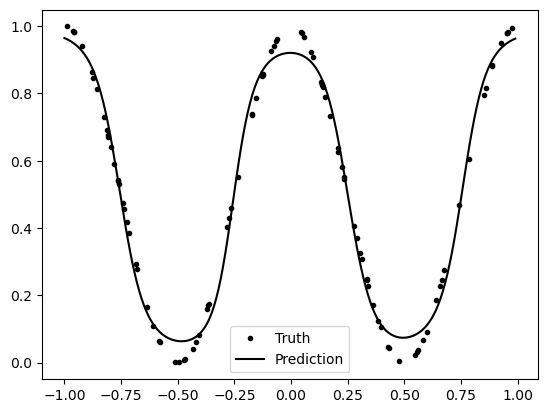

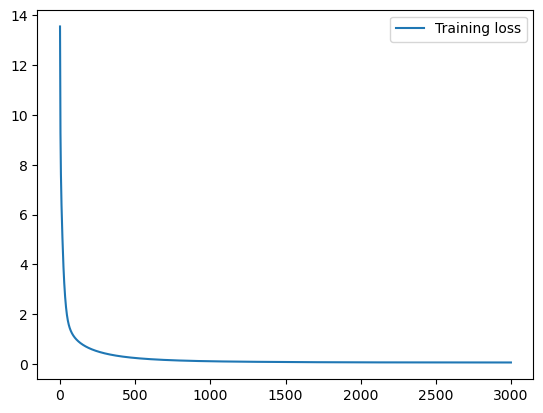

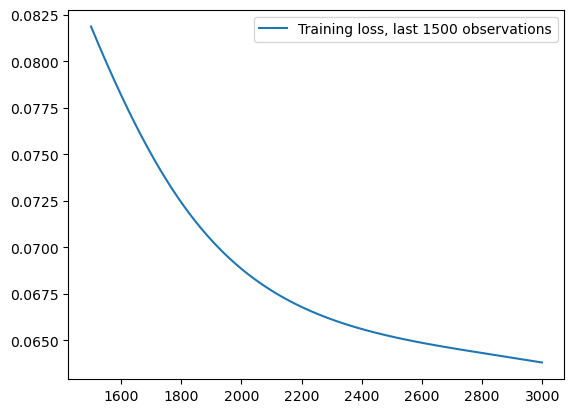

In [36]:
# Plot train samples, truth, test samples and predictions
plt.plot(x, y, 'k.', label="Truth")
plt.plot(x_pred, y_pred, 'k-', label="Prediction")
plt.legend()
plt.show()
plt.plot(range(n_iterations), network.loss, label="Training loss")
plt.legend()
plt.show()
plt.plot(range(int(n_iterations / 2), n_iterations),
         network.loss[int(n_iterations / 2):],
         label=f"Training loss, last {int(n_iterations / 2)} observations")
plt.legend()
plt.show()

YOUR ANSWER HERE

# Step 3: Fashion items classification

Let's test our model on a more sophisticated classification dataset, namely [Zalando research's fashion MNIST dataset](https://github.com/zalandoresearch/fashion-mnist). This dataset includes 70,000 images of fashion items 28x28 pixels (=784), split into a training set of 60,000 images and a test set of 10,000 images. Each image is labeled with a digit from 0 to 9.

The original [MNIST dataset](http://yann.lecun.com/exdb/mnist/) consists in handwritten digits, e.g. to automatically read the addresses on mails. The performance of neural networks on this task was so much better than previous approaches that it (re-)sparked a lot of interest in them (and brought fame to Yann LeCun). It is now considered an "easy" task.

### Exercise 8: Get to know the dataset

1. Just run the following cell to download the Fashion MNIST database.

In [37]:
import tensorflow as tf

In [38]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

2. Next check that the shapes of the training and test data, and their content, are what you expect. Please answer by *e.g.* printing the shapes of the training and test data as well as the ranges of values that are contained in them and comment in the next cell. **Qualitative code expected in the cell below, qualitative textual answer in the subsequent cell marked "YOUR ANSWER HERE"**.

In [39]:
# YOUR CODE HERE
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


YOUR ANSWER HERE

First we will train 60000 samples of size 28 x 28.

Later test on 10000 samples of the same size of 28 x 28.

3. Get a feel for the dataset by displaying some images in _grayscale_. Please print one image per class together with their class label.

*Python hint*: [plt.imshow](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.imshow.html).

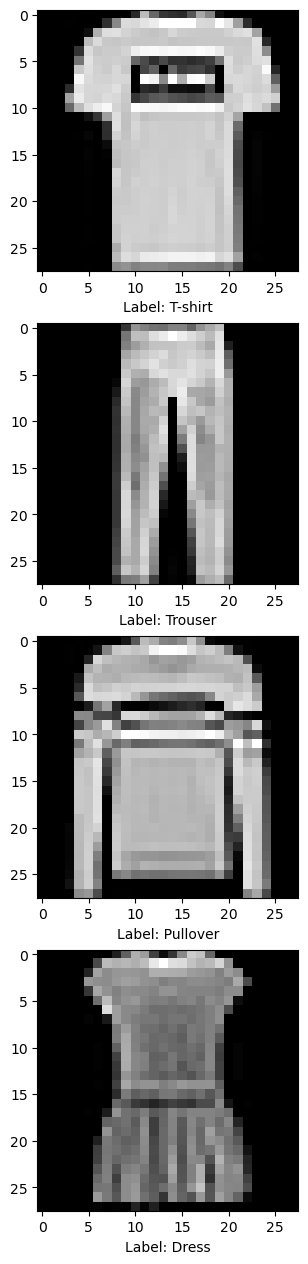

In [40]:
# YOUR CODE HERE

labels = [ 'T-shirt', 'Trouser', 'Pullover', 'Dress' ]
plt.figure(figsize=(40, 40))
appeared = False
for i in range(0, 4):
    for j in range(60000):
        if y_train[j] == i and appeared == False:
            plt.subplot(10, 1, i+1)
            plt.xlabel(f'Label: {labels[i]}')
            plt.imshow(x_train[j], cmap = 'gray')
            appeared = True
    appeared = False
plt.show()

### Exercise 9: Create a one-hot encoding of the labels

`y_train` and `y_test` currently contain the digits 0-9, which is not suited for training as we want to perform a 10-class classification training on our network. To fix this, we need to perform a so-called one-hot encoding on the labels which convert each digit into a vector of length 10 full of zeros, except the element corresponding to the digit which should be 1.  For example, if our label is 3, then the corresponding one-hot encoding is [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].

1. Convert the `y_train` and `y_test` vectors into one-hot encodings.

In [41]:
# y_train =  ...
# y_test =  ...
# YOUR CODE HERE
y_train = np.eye(len(np.unique(y_test)))[y_train]
y_test =  np.eye(len(np.unique(y_test)))[y_test]

### Exercise 10: Train your network to recognize fashion items

1. Instantiate a network with 1 hidden layer of 32 nodes, with sigmoid activations and a cross-entropy loss. Note that this network cannot take 2-dimensional data points as input. Therefore, it should be instantiated to expect 'flattened' images as input, i.e., images that have been converted to vectors.

In [42]:
# network = ...
# YOUR CODE HERE
network = Network(sizes = [784, 32, 10], activations = [Sigmoid, Sigmoid])


2. Train the network using the first 10000 images in the training set, any learning rate / number of epochs (see Exercise 4.4.). 

In [ ]:
# Train the network for X epochs with a learning rate of Y
# Our implementation does not deal with 3D inputs, so you need
# to "flatten" the 28x28 images in a single vector / observation / sample / row.
# YOUR CODE HERE
x_t = x_train[:10000, :] 
y_t = y_train[:10000, :]

x_t = x_t.reshape((10000, 784))

network.train(x_train=x_t, y_train=y_t, cost=CrossEntropy, learning_rate=0.7, epochs=150, verbose=True)

epoch: 0 
	loss:  51072.96322659545
epoch: 1 
	loss:  45083.205121500665
epoch: 2 
	loss:  40942.96805915394
epoch: 3 
	loss:  37953.8345798042
epoch: 4 
	loss:  36043.20859121451
epoch: 5 
	loss:  34860.08848058983
epoch: 6 
	loss:  33925.00467230847
epoch: 7 
	loss:  32429.255608759842
epoch: 8 
	loss:  31430.017735292047
epoch: 9 
	loss:  30445.678644918582
epoch: 10 
	loss:  29748.66022297333
epoch: 11 
	loss:  29202.82779517651
epoch: 12 
	loss:  28722.87045819085
epoch: 13 
	loss:  28234.647118308418
epoch: 14 
	loss:  27768.636130534647
epoch: 15 
	loss:  27603.876539744924


3. Plot the evolution of the loss and go back to training, tweaking the learning rate / number of iterations until the plot looks satisfactory.

In [ ]:
# YOUR CODE HERE
plt.plot(network.loss)
plt.show()

4. Compute the accuracy of the model (and put it in `accuracy`) on the test data and compare a few predictions to their images in grayscale (see labels [here](https://github.com/zalandoresearch/fashion-mnist#labels)).

In [ ]:
# Compute the accuracy
# accuracy = ...

# For example, display an example of a class probability and its true value
# YOUR CODE HERE
x_test_flattened = x_test.reshape(-1, 784)

predictions, _, _ = network.feed_forward(x_test_flattened)

predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)  

accuracy = np.mean(predicted_labels == true_labels)

r = np.random.randint(0, 9999)
plt.figure()
plt.imshow(x_test[r].reshape(28, 28), cmap='gray')
plt.title(f'Predicted: {predicted_labels[r]}, Actual: {true_labels[r]}')
plt.xlabel(f'Guessing label: {predicted_labels[r]}, Actual: {true_labels[r]}')
plt.show()

print(f'Accuracy: {accuracy}')

**CONGRATULATIONS**, you reimplemented a dense multilayer perceptron neural network from scratch using only NumPy, and you can (relatively) effectively classify **images** of fashion items.